# Intepretation

In [11]:
from config import plotly_id, plotly_key
import classifiers as clf

import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pickle

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
unbalanced     = pd.read_pickle("../Data/unbalanced.pkl")
balanced_smote = pd.read_pickle("../Data/balanced_smote.pkl")
balanced_under = pd.read_pickle("../Data/balanced_under.pkl")
y_labels       = pd.read_pickle("../Data/y_labels.pkl")

### Confusion Matrix

In [36]:
# best estimators of test sets
best_estimators = pd.concat([
    unbalanced[    unbalanced[    'Split'] == 'Test'],
    balanced_smote[balanced_smote['Split'] == 'Test'],
    balanced_under[balanced_under['Split'] == 'Test']],
    ignore_index=True)

best_estimators

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Unbalanced,Dummy,{'strategy': 'most_frequent'},Test,0.763436,0.582835,0.763436,0.661022,"[[1733, 0, 0], [164, 0, 0], [373, 0, 0]]"
1,Unbalanced,Logistic Regression,"{'C': 1000000.0, 'fit_intercept': True, 'multi...",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
2,Unbalanced,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
3,Unbalanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 100, 'n_...",Test,0.782379,0.729329,0.782379,0.727244,"[[1689, 14, 30], [149, 4, 11], [282, 8, 83]]"
4,Unbalanced,Decision Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
5,Unbalanced,Random Forest,"{'max_depth': 2, 'max_features': 5, 'min_impur...",Test,0.763436,0.582835,0.763436,0.661022,"[[1733, 0, 0], [164, 0, 0], [373, 0, 0]]"
6,Unbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Test,0.784581,0.734862,0.784581,0.722891,"[[1705, 6, 22], [151, 3, 10], [295, 5, 73]]"
7,SMOTE Oversampled,Dummy,{'strategy': 'stratified'},Test,0.329515,0.608010,0.329515,0.396527,"[[579, 581, 573], [59, 50, 55], [128, 126, 119]]"
8,SMOTE Oversampled,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.656828,0.740513,0.656828,0.689831,"[[1251, 268, 214], [73, 67, 24], [124, 76, 173]]"
9,SMOTE Oversampled,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.666520,0.724553,0.666520,0.677891,"[[1369, 306, 58], [77, 76, 11], [209, 96, 68]]"


In [4]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
accuracy

Data,Unbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.784581,0.564317,0.420705
Decision Tree,0.781498,0.589868,0.492952
Dummy,0.763436,0.329515,0.329075
K Nearest Neighbors,0.782379,0.676211,0.381498
Logistic Regression,0.781498,0.656828,0.464758
Multinomial Naive Bayes,0.781498,0.666520,0.552423
Random Forest,0.763436,0.560352,0.459912


In [5]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
f1_scores

Data,Unbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.722891,0.618791,0.497530
Decision Tree,0.712267,0.641933,0.570614
Dummy,0.661022,0.396527,0.392951
K Nearest Neighbors,0.727244,0.688653,0.450721
Logistic Regression,0.712267,0.689831,0.541849
Multinomial Naive Bayes,0.712267,0.677891,0.618208
Random Forest,0.661022,0.618355,0.535518


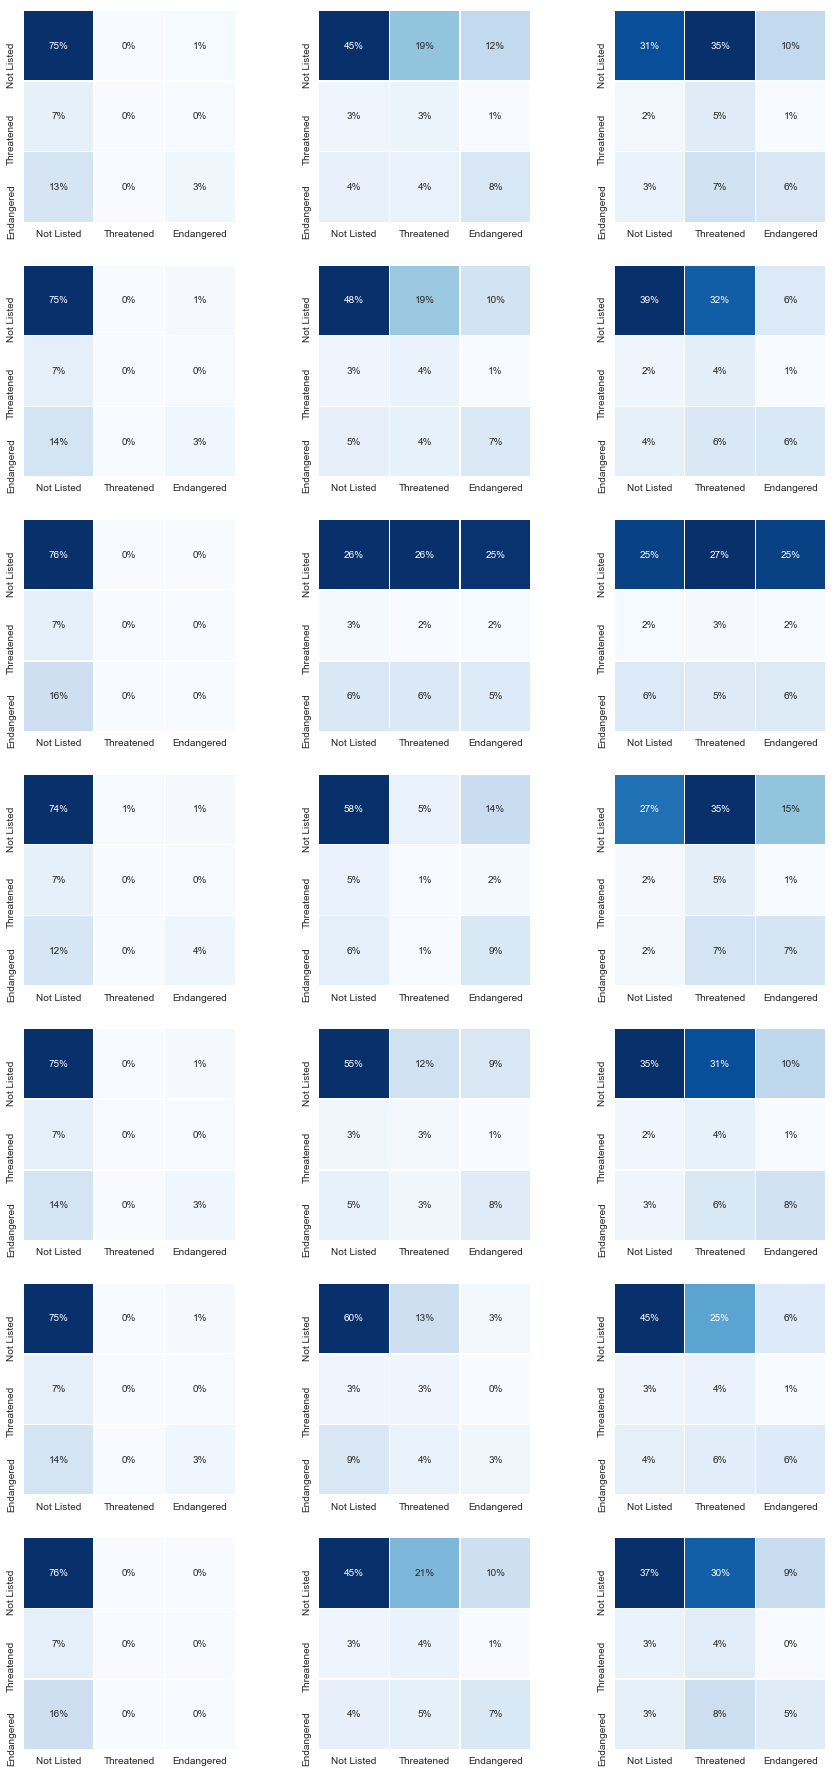

In [6]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Classifier Performance Metrics

In [32]:
# all models
all_models = pd.concat([unbalanced, balanced_smote, balanced_under], ignore_index=True)
all_models.sort_values(by=['F1 Score','Accuracy'], ascending=False).head()

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
37,Unbalanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 100, 'n_...",Train,0.774926,0.727532,0.774926,0.733284,NaN
29,Unbalanced,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 100, '...",Train,0.774815,0.726225,0.774815,0.732648,NaN
265,Unbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Train,0.789688,0.746055,0.789688,0.731188,NaN
266,Unbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 200}",Train,0.789027,0.749627,0.789027,0.730945,NaN
267,Unbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Train,0.788697,0.748386,0.788697,0.730874,NaN


In [40]:
# best_estimators
best_estimators.sort_values(by=['F1 Score','Accuracy'], ascending=False).head(10)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
3,Unbalanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 100, 'n_...",Test,0.782379,0.729329,0.782379,0.727244,"[[1689, 14, 30], [149, 4, 11], [282, 8, 83]]"
6,Unbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Test,0.784581,0.734862,0.784581,0.722891,"[[1705, 6, 22], [151, 3, 10], [295, 5, 73]]"
1,Unbalanced,Logistic Regression,"{'C': 1000000.0, 'fit_intercept': True, 'multi...",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
2,Unbalanced,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
4,Unbalanced,Decision Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",Test,0.781498,0.709913,0.781498,0.712267,"[[1712, 0, 21], [154, 0, 10], [311, 0, 62]]"
8,SMOTE Oversampled,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.656828,0.740513,0.656828,0.689831,"[[1251, 268, 214], [73, 67, 24], [124, 76, 173]]"
10,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200, 'n_...",Test,0.676211,0.710974,0.676211,0.688653,"[[1310, 108, 315], [108, 16, 40], [139, 25, 209]]"
9,SMOTE Oversampled,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.666520,0.724553,0.666520,0.677891,"[[1369, 306, 58], [77, 76, 11], [209, 96, 68]]"
0,Unbalanced,Dummy,{'strategy': 'most_frequent'},Test,0.763436,0.582835,0.763436,0.661022,"[[1733, 0, 0], [164, 0, 0], [373, 0, 0]]"
5,Unbalanced,Random Forest,"{'max_depth': 2, 'max_features': 5, 'min_impur...",Test,0.763436,0.582835,0.763436,0.661022,"[[1733, 0, 0], [164, 0, 0], [373, 0, 0]]"


In [38]:
best_estimators.describe()

,Accuracy,Precision,Recall,F1 Score
count,21.000000,21.000000,21.000000,21.000000
mean,0.599203,0.702503,0.599203,0.611826
std,0.160323,0.054495,0.160323,0.105794
min,0.329075,0.582835,0.329075,0.392951
25%,0.464758,0.709913,0.464758,0.541849
50%,0.589868,0.724553,0.589868,0.641933
75%,0.763436,0.734862,0.763436,0.689831
max,0.784581,0.746374,0.784581,0.727244


(0, 1)

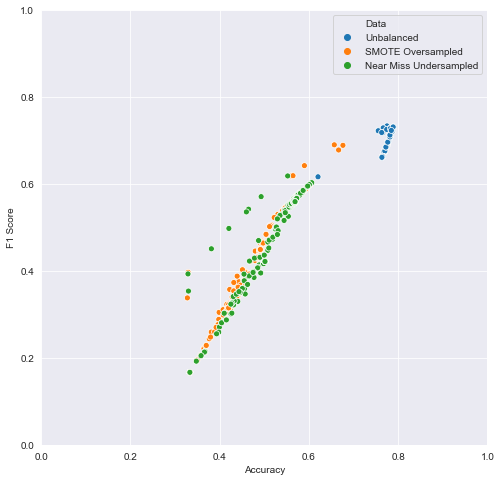

In [44]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Accuracy", y="F1 Score", hue='Data', data=all_models)
az.set_xlim(0,1)
az.set_ylim(0,1)

(0, 1)

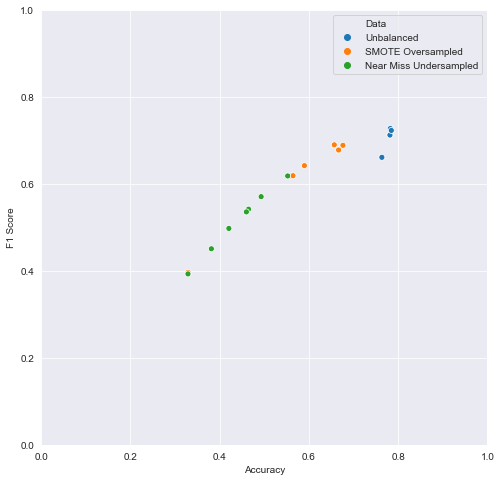

In [43]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Accuracy", y="F1 Score", hue='Data', data=best_estimators)
az.set_xlim(0,1)
az.set_ylim(0,1)

### Classifier Efficiency

In [ ]:
# create performance visualization in Plotly
hover_text  = []
color_range = []

for index, row in baseline.iterrows():
    hover_text.append(('Parameters: {params}<br>'+
                       'Split: {split}').format(params=row['Parameters'],
                                                split=row['Split']))
#    color_range.append(min(row['Dogs per Store'],120))

trace0 = go.Scatter(
    x=baseline['Accuracy'],
    y=baseline['F1 Score'],
    text=hover_text,
    mode='markers',
    marker=dict(
#        size=bcg_matrix['Stores'],
#        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Dogs Per Store'
            ),
        colorscale='RdBu'
    )
)

data = [trace0]
layout = go.Layout(
    title='Baseline',
    xaxis=dict(
        title='Model Performance Metric [Accuracy]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Model Performance Metric [F1 Score]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='endangered-species')

### Feature Importance

In [ ]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()